# Chapter 2. R basics

## 2.1 Basic Introduction

After reading the previous chapter, you should already have a basic understanding of how R and Rstudio operate. Lets get started with some R basics. 

### 2.1.1 R variables

In a R session, you will need to utilize "variables" to store data. Every variable occupies "real estate" in your computer's memory [RAM](https://en.wikipedia.org/wiki/Random-access_memory)


In [1]:
a <- 2  # store 2 as variable a

Note that any text after a "#" is ignored by R


```{note}
For everyone's sake, please use comments to annotate your code. Well-placed comments can help people (include you) to understand the functionality of the code
```

In [2]:
a # display it

[1] 2

In [3]:
a * a 

[1] 4

Store a variable:

In [4]:
a_squared <- a * a 

```{note}
Unlike Python or most other programming languages, R uses the `<-` [operator to assign variables](https://stat.ethz.ch/R-manual/R-devel/library/base/html/assignOps.html). You can use `=` as well, but it does not work everywhere, so better to stick with `<-`.
```

### 2.1.2 R name your variables

In R, you can name variables in the following way to keep track of related variables:

In [5]:
my.var = 1

In [6]:
my_var = 1

In [7]:
# my var = 1 # This name is not valid, so do not use space in naming

### 2.1.3 R functions

R have some pre-built functions for different functionality. But you can also defined your own function.

In [8]:
sqrt(a_squared) # square root

[1] 2

In [9]:
log( a_squared, base = 2) # log2 transformed

[1] 2

In [10]:
BMI_index <- function(weight_in_kg, height_in_m){
   weight_in_kg/height_in_m^2 
}

In [11]:
BMI_index(65, 1.7) # Have a try on your own data

[1] 22.49135

### 2.1.4 R Data types

R have different types of variables including numeric numbers, character strings, and other more advanced types such as factor, Boolean ("logical"; `TRUE` or `FALSE`), and data frame. 

The function `class` helps us determine what type of object we have:

In [12]:
class(a)

[1] "numeric"

In [13]:
bol <- TRUE

In [14]:
class(bol)

[1] "logical"

also, try is.*() function to check whether the input variable is certain type of data

In [15]:
is.logical(bol) # Try "TAB" after "is." to see how many functions you find

[1] TRUE

You can also use as.*() function to do input data type conversion

In [16]:
class(3.1)

[1] "numeric"

In [17]:
as.integer(3.1)

[1] 3

In [18]:
class(as.integer(3.1))

[1] "integer"

Data type coversion should be used with caution. This procedure is typically not advised for beginners due to the potential for unclear or imprecise conversions.

In [19]:
as.logical(0)

[1] FALSE

In [20]:
as.logical(3)

[1] TRUE

*What just happened?!* R maps all values other than `0` to logical `True`, and `0` to `False`. This can be useful in some cases, for example, when you want to convert all your data to Presence-Absence only.

## 2.2 R Vector, Matrix, Dataframe, Lists

Up to now, the variables we have defined contains only one number. This is not very useful for big data analysis. R has different built-in structures (objects) for data manipulation and more advanced computation. 

### 2.2.1 Vectors

The Vector is a fundamental data object / structure in R. *A vector is like a single column or row in a spreadsheet.*

Build a vector with `c` (stands for "`c`oncatenate"): 

In [21]:
v <- c(1, 2, 4, 8, 16)

In [22]:
v # Display the vector-valued variable you created

[1]  1  2  4  8 16

In [23]:
is.vector(v) # check if v's a vector

[1] TRUE

You can do operations on vector as well

In [24]:
log(v, base = 2)

[1] 0 1 2 3 4

In [25]:
mean(v) # mean

[1] 6.2

In [26]:
length(v) # how many elements

[1] 5

Numeric indexing

In [27]:
v[1]   # select the first element

[1] 1

In [28]:
v1 <- c(0.02, TRUE, 1)
v1

[1] 0.02 1.00 1.00

TRUE get converted to 1, why?

```{note}
R vectors (and matrix, array) can only store data of a single type (e.g., all numeric or all character). Attempting to merge different data types will prompt R to standardize everything to a single data type. To observe this behavior, experiment with the following example:
```

In [29]:
names(v1) <- c("myfirstelement","2","3") # You can give name to each elements, through names() function

In [30]:
v1 # display

myfirstelement              2              3 
          0.02           1.00           1.00


### 2.2.2 Matrices and arrays

A R "matrix" is a 2 dimensional vector (has both rows and columns).

Try this:

In [31]:
1:25 # you can generate a series of number by "start:end"

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25

In [32]:
seq(from = 1,to = 100,length.out = 25) # or you can generate a more complicated series sequence by using seq()function, try ?seq()

[1]   1.000   5.125   9.250  13.375  17.500  21.625  25.750  29.875  34.000
[10]  38.125  42.250  46.375  50.500  54.625  58.750  62.875  67.000  71.125
[19]  75.250  79.375  83.500  87.625  91.750  95.875 100.000

In [33]:
my.mat1 <- matrix(seq(from = 1,to = 100,length.out = 25), 5, 5) # place the vector by
my.mat1

1.000,21.625,42.250,62.875,83.500
5.125,25.750,46.375,67.000,87.625
9.250,29.875,50.500,71.125,91.750
13.375,34.000,54.625,75.250,95.875
17.500,38.125,58.750,79.375,100.000


you can order the elements of a matrix by row instead of column (default).

In [34]:
my.mat1 <- matrix(seq(from = 1,to = 100,length.out = 25), 5, 5, byrow=TRUE)
my.mat1

1.000,5.125,9.250,13.375,17.500
21.625,25.750,29.875,34.000,38.125
42.250,46.375,50.500,54.625,58.750
62.875,67.000,71.125,75.250,79.375
83.500,87.625,91.750,95.875,100.000


In [35]:
dim(my.mat1) #get the size of the matrix

[1] 5 5

In [36]:
colMeans(my.mat1) # get the means for each column, similarly try rowMeans()

[1] 42.250 46.375 50.500 54.625 58.750

In [37]:
log(my.mat1)  # log() can also work in Matrix

0.000000,1.634131,2.224624,2.593387,2.862201
3.073850,3.248435,3.397022,3.526361,3.640870
3.743604,3.836761,3.921973,4.000492,4.073291
4.141149,4.204693,4.264439,4.320816,4.374183
4.424847,4.473066,4.519067,4.563045,4.605170


like R vectors, R will do the same sort of type homogenization as R vectors. 

Try inserting a text value in `my.mat1`and see what happens: 

In [38]:
my.mat1[1,1] <- "one"
my.mat1

one,5.125,9.25,13.375,17.5
21.625,25.75,29.875,34,38.125
42.25,46.375,50.5,54.625,58.75
62.875,67,71.125,75.25,79.375
83.5,87.625,91.75,95.875,100


`my.mat1` changed from `A matrix: 5 × 5 of type dbl` to `A matrix: 5 × 5 of type chr`. 
That is, inserting a string in one location converted all the elements of the matrix to the `chr` (string) data type.

### 2.2.3 Data frames

Data frames are a fundamental and versatile data structure in R, offering a crucial advantage over matrices and vectors. Unlike matrices and vectors, R data frames can accommodate heterogeneous data types in each column, such as numeric values, strings, and boolean values, or even a mix of these data types, resembling the structure of a typical spreadsheet. As a result, data frames have become a cornerstone in R programming, widely utilized by statistical analysis and plotting functions as well as various packages within the R ecosystem. 

Let's build and manipulate a dataframe. First create three vectors:

In [39]:
column1 <- seq(from = 1,to = 10, by = 1)
column1

[1]  1  2  3  4  5  6  7  8  9 10

In [40]:
column2 <- c( rep("A", 5), rep("C", 5) )   # function rep() can be used to repeat an input for several times. try ?rep()
column2

[1] "A" "A" "A" "A" "A" "C" "C" "C" "C" "C"

In [41]:
set.seed(2024) # seed for random numbers
column3 <- c( rnorm(n = 5,mean = 2.8,sd = 1.5), rnorm(n = 5,mean = 2,sd = 1) ) # 10 random numbers from two different normal distribution
column3

[1] 4.2729541 3.5030726 2.6380430 2.4806827 4.5371477 3.2923548 2.5346471
 [8] 1.8729653 0.7751246 0.8786487

Now combine them into a dataframe:

In [42]:
my.df <- data.frame(column1, column2, column3)
my.df

column1,column2,column3
<dbl>,<chr>,<dbl>
1,A,4.2729541
2,A,3.5030726
3,A,2.6380430
4,A,2.4806827
5,A,4.5371477
6,C,3.2923548
7,C,2.5346471
8,C,1.8729653
9,C,0.7751246


You can easily assign names to the columns of dataframes:

In [43]:
names(my.df) <- c("MyFirstColumn", "My Second Column", "My.Third.Column")
my.df

MyFirstColumn,My Second Column,My.Third.Column
<dbl>,<chr>,<dbl>
1,A,4.2729541
2,A,3.5030726
3,A,2.6380430
4,A,2.4806827
5,A,4.5371477
6,C,3.2923548
7,C,2.5346471
8,C,1.8729653
9,C,0.7751246


And unlike matrices, you can access the contents of data frames by naming the columns directly using a $ sign:

In [44]:
my.df$MyFirstColumn # try `TAB` to complete the column name as well

[1]  1  2  3  4  5  6  7  8  9 10



And also, you can replace that column name using the `colnames` function:

In [45]:
colnames(my.df)

[1] "MyFirstColumn"    "My Second Column" "My.Third.Column"

In [46]:
colnames(my.df)[1] <- "Sample_ID"
colnames(my.df)[2] <- "Group"
colnames(my.df)[3] <- "Value"
my.df

Sample_ID,Group,Value
<dbl>,<chr>,<dbl>
1,A,4.2729541
2,A,3.5030726
3,A,2.6380430
4,A,2.4806827
5,A,4.5371477
6,C,3.2923548
7,C,2.5346471
8,C,1.8729653
9,C,0.7751246


You can also access elements by using numerical indexing:  That is, you asked R to return values of `my.df` in all Rows (therefore, nothing before the comma), and the first column (`1` after the comma). 

In [47]:
my.df[,1]

[1]  1  2  3  4  5  6  7  8  9 10

You can also add numeric index (1, as the first row) to get the first row, first column element.

In [48]:
my.df[1,1]

[1] 1

Instead of the numeric index, you could also use the name as the index.

In [49]:
my.df[,c("Group","Value")] # show two specific columns only

Group,Value
<chr>,<dbl>
A,4.2729541
A,3.5030726
A,2.6380430
A,2.4806827
A,4.5371477
C,3.2923548
C,2.5346471
C,1.8729653
C,0.7751246


You can check whether a particular object is a dataframe data structure with:

In [50]:
class(my.df)

[1] "data.frame"

You can check the structure of a dataframe with `str()`:

In [51]:
str(my.df)

'data.frame':	10 obs. of  3 variables:
 $ Sample_ID: num  1 2 3 4 5 6 7 8 9 10
 $ Group    : chr  "A" "A" "A" "A" ...
 $ Value    : num  4.27 3.5 2.64 2.48 4.54 ...


You can print the column names and top few rows with `head()`:

In [52]:
head(my.df) # try get the bottom few rows with `tail()`:

,Sample_ID,Group,Value
,<dbl>,<chr>,<dbl>
1,1,A,4.272954
2,2,A,3.503073
3,3,A,2.638043
4,4,A,2.480683
5,5,A,4.537148
6,6,C,3.292355


#### Formula used in R

In R, a formula is a symbolic representation of a statistical model or a relationship between variables

A typical formula looks like:
*response_variable ~ predictor_variable1 + predictor_variable2 + ...*

Here, the `~` symbol separates the response variable (dependent variable) from the predictor variables (independent variables). The `+` symbol is used to specify multiple predictor variables in the formula.


If we consider each row in our `my.df` dataframe as a sample observation, with the Group column denoting the type of treatment received and the Value column representing the final measurement of the response variable, how can we determine the significance of the treatment effect?

In [53]:
wilcox.test(formula = Value ~  Group, data = my.df) # When we set alpha = 0.05, you find no significant difference between Group A, Group C


	Wilcoxon rank sum exact test

data:  Value by Group
W = 22, p-value = 0.05556
alternative hypothesis: true location shift is not equal to 0


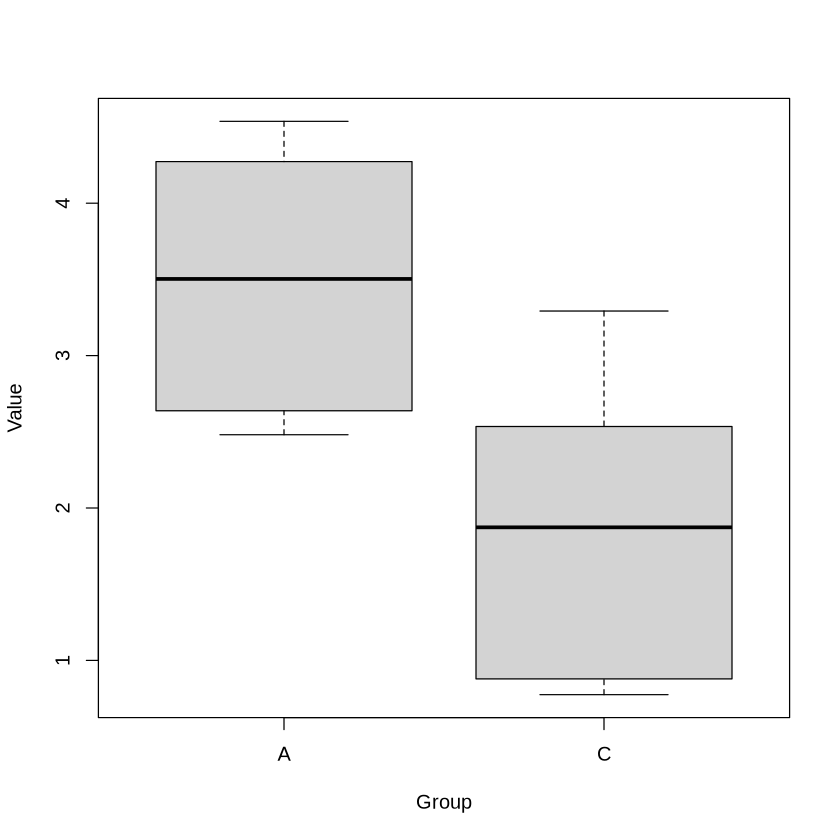

In [54]:
boxplot(formula = Value ~  Group, data = my.df)

#### Case Exercise 2. The first statistics

After careful review, your superviser recommanded you to do a parametric test (student's t test) rather than a rank-based non-parametric test (wilcox's test). Why it is reasonable? How to do it in R?  (clue: ?t.test() ?shapiro.test())

### 2.2.4 Lists

List is another important data structure widely used in R. Essentially, a list functions as a structured assembly of objects, allowing for the inclusion of different types of variables and data entities  (e.g., you can put dataframe and vector together) in a specific *order*.

Try this:

In [55]:
my.list <- list(genus=c("Bifidobacterium","Akkermansia"), rel_abundance=c(20 , 10))
my.list

$genus
[1] "Bifidobacterium" "Akkermansia"    

$rel_abundance
[1] 20 10

In [56]:
my.list[["genus"]] # Get the list item by using nested square brackets 

[1] "Bifidobacterium" "Akkermansia"

In [57]:
my.list$genus # or do it this way. Quite similar to those in dataframe, right?

[1] "Bifidobacterium" "Akkermansia"

Or, you can access contents of a list item using the list order index:

In [58]:
my.list[[1]]

[1] "Bifidobacterium" "Akkermansia"

In [59]:
my.list[[1]][1] # remeber, each elements of my.list is vector, therefore, we can apply the rule of vector to it

[1] "Bifidobacterium"

Maybe, you will have a guess now that dataframe object is actually a data structure built upon list object

### 2.2.5 Matrix vs Dataframe

While data frames offer considerable flexibility and convenience for statistical analyses, plotting, and data output in R, there are instances where utilizing R matrices becomes necessary due to performance considerations. Data frames may exhibit decreased efficiency when large-scale mathematical computations or operations, such as matrix-vector multiplications or other linear algebra tasks, need to be executed. In such scenarios, converting a data frame to a matrix can significantly enhance computational speed and efficiency.

To see the difference in memory usage of matrices vs dataframes, try this:

In [60]:
my.mat1 <- matrix(seq(from = 1,to = 100,length.out = 25), 5, 5, byrow=TRUE)
my.mat1 # Again, create one matrix

1.000,5.125,9.250,13.375,17.500
21.625,25.750,29.875,34.000,38.125
42.250,46.375,50.500,54.625,58.750
62.875,67.000,71.125,75.250,79.375
83.500,87.625,91.750,95.875,100.000


In [61]:
my.mat12df = as.data.frame(my.mat1)
my.mat12df

V1,V2,V3,V4,V5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.000,5.125,9.250,13.375,17.500
21.625,25.750,29.875,34.000,38.125
42.250,46.375,50.500,54.625,58.750
62.875,67.000,71.125,75.250,79.375
83.500,87.625,91.750,95.875,100.000


In [62]:
object.size(my.mat1) # returns size of an R object (variable) in bytes

416 bytes

In [63]:
object.size(my.mat12df)

1464 bytes

Quite a big difference!

## 2.3 Further reading 


Search online for "R tutorial".

Explore more functionality by using different R packages designed for different purpose! *Remember, all R packages come with pdf guides/documentation!* 

### Some useful R packages

|Packages|Description|
|:-|:-|
|tidyr   | Used in data wrangling, provides functions like gather, spread, and separate, which facilitate the transformation of data between wide and long formats. |
|dplyr |The dplyr package provides a concise and intuitive syntax for data manipulation tasks. Its functions, such as filter, select, mutate, and summarize, allow you to efficiently subset, transform, and summarize data frames. |
|ggplot2 | nice package for data visualization |
|stringr | string manipulation and text mining |


### Some useful online tutorial

|Source|Description|
|:-|:-|
| https://r4ds.had.co.nz/   | R for Data Science |

